In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
max_pow = 15

##### Create a 50 row dataframe with columns [x, sin(x) + noise, x^2, x^3, ... x^max_pow]

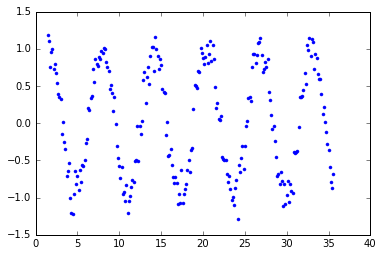

In [3]:
x = np.array([i / 7 for i in range(10, 250)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0, 0.15, len(x))
data = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])
for i in range(2, max_pow + 1):
    data['x_%d'%i] = data['x']**i
    
plt.plot(data['x'], data['y'],'.')
plt.show()

In [4]:
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2, power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])
    
    if power in range(2, max_pow + 1):
        plt.subplot(4, 4, (power % 16) - 1)
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'],'.', markersize=4)
        plt.title('%d'% (power))
        plt.axis('off')
    
    #Return the result in pre-defined format
    rss = sum((y_pred - data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [5]:
#Initialize a dataframe to store the results:
columns = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1, max_pow + 1)]
index = ['model_pow_%d'%i for i in range(1, max_pow + 1)]
coef_matrix_simple = pd.DataFrame(index=index, columns=columns)

In [6]:
plt.figure(figsize=(16, 16))
for i in range(1, max_pow +1):
    coef_matrix_simple.iloc[i-1, 0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

NameError: name 'models_to_plot' is not defined

In [ ]:
ralph = coef_matrix_simple.values[1:, 2:-1]
flip = np.flip(ralph, 0)
puffy = np.nan_to_num(flip)

In [ ]:
plt.pcolor(ralph)
plt.show()

In [ ]:
coef_matrix_simple

In [ ]:
for power in range(1, 7):
        plt.subplot(230 + power)
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'],'.')
        plt.title('Plot for power: %d'%power)